In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
from lmfit.models import ExponentialModel, GaussianModel

data1nm = pd.read_csv('VACANCY1nm.csv')
data5nm = pd.read_csv('VACANCY5nm.csv')
data10nm = pd.read_csv('VACANCY10nm.csv')
data15nm = pd.read_csv('VACANCY15nm.csv')
data20nm = pd.read_csv('VACANCY20nm.csv')
data25nm = pd.read_csv('VACANCY25nm.csv')
data30nm = pd.read_csv('VACANCY30nm.csv')

fine1nm = pd.read_csv('RANGE1nmf.csv')
fine5nm = pd.read_csv('RANGE5nmf.csv')
fine10nm = pd.read_csv('RANGE10nmf.csv')
fine15nm = pd.read_csv('RANGE15nmf.csv')
fine20nm = pd.read_csv('RANGE20nmf.csv')
fine25nm = pd.read_csv('RANGE25nmf.csv')
fine30nm = pd.read_csv('RANGE30nmf.csv')

ga1nm = pd.read_csv('ga1nm.csv')
ga5nm = pd.read_csv('ga5nm.csv')
ga10nm = pd.read_csv('ga10nm.csv')
ga15nm = pd.read_csv('ga15nm.csv')
ga20nm = pd.read_csv('ga20nm.csv')
ga25nm = pd.read_csv('ga25nm.csv')
ga30nm = pd.read_csv('ga30nm.csv')


In [39]:
def plot3dVacancy(depth,data,thickness,lab):
    model1 = GaussianModel() 
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 2e8, vary=True)
    params['center'].set(value = 0, vary=True)
    params['sigma'].set(value = 7.5, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,30,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    if lab == 0:
        # ax.scatter(depth, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', lw = 1.3)
    else:
        # ax.scatter(depth, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 1.3)
    
    obj = ax.fill_between(fit_x, 0, fitcurve, step='mid', alpha=0.1) 
    ax.add_collection3d(obj, zs = thickness, zdir = 'y')

In [40]:
def plot3dSilicon(DEPTH,data,thickness,lab,c):
    if lab == 0:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = c)
    else:
        ax.plot(DEPTH, data, zs=thickness, zdir='y', lw = 2, color = c, label = 'Si')

In [41]:
def plot3dGallium(depth,data,thickness,lab):
    model1 = GaussianModel() 
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 1e6, vary=True)
    params['center'].set(value = 10, vary=True)
    params['sigma'].set(value = 3, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,30,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    if lab == 0:
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', lw = 1, color = 'k')
    else:
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', lw = 1, color = 'k', label = 'Gallium Ion Distribution')

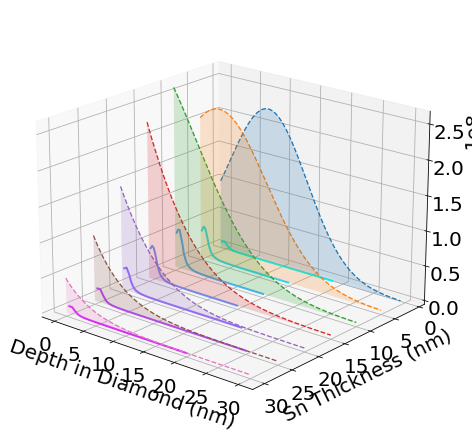

In [42]:
cmap = cm.cool  # You can choose a different colormap
colors = [cmap(i / 7) for i in range(7)]
plt.rcParams.update({'font.size': 20})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
ax = fig.add_subplot(projection='3d')
plt.grid()

# ax.legend()
# ax.set_xlim(0, 30)
# ax.set_ylim(0, 35)
# ax.set_zlim(0, 2.8e8)
ax.set_xlabel('Depth in Diamond (nm)')
ax.set_ylabel('Sn Thickness (nm)')
# ax.set_zlabel('Density per Dose (cm$^{-3}$/cm$^{-2}$)')

plot3dSilicon(fine1nm['DEPTH'][1:],fine1nm['Sn'][1:], 1,1,colors[0])
plot3dSilicon(fine5nm['DEPTH'][1:],fine5nm['Sn'][1:], 5,0,colors[1])
plot3dSilicon(fine10nm['DEPTH'][1:],fine10nm['Sn'][1:],10,0,colors[2])
plot3dSilicon(fine15nm['DEPTH'][1:],fine15nm['Sn'][1:], 15,0,colors[3])
plot3dSilicon(fine20nm['DEPTH'][1:],fine20nm['Sn'][1:], 20,0,colors[4])
plot3dSilicon(fine25nm['DEPTH'][1:],fine25nm['Sn'][1:], 25,0,colors[5])
plot3dSilicon(fine30nm['DEPTH'][1:],fine30nm['Sn'][1:], 30,0,colors[6])

# plot3dGallium(data1nm['DEPTH'],data1nm['Ga'], 1,1)
# plot3dGallium(data5nm['DEPTH'],data5nm['Ga'], 5,0)
# plot3dGallium(data10nm['DEPTH'],data10nm['Ga'],10,0)
# plot3dGallium(data15nm['DEPTH'],data15nm['Ga'], 15,0)
# plot3dGallium(data20nm['DEPTH'],data20nm['Ga'], 20,0)
# plot3dGallium(data25nm['DEPTH'],data25nm['Ga'], 25,0)
# plot3dGallium(data30nm['DEPTH'],data30nm['Ga'], 30,0)

plot3dVacancy(data1nm['DEPTH'][1:],data1nm['C'][1:]*1e8, 1,1)
plot3dVacancy(data5nm['DEPTH'][1:],data5nm['C'][1:]*1e8, 5,0)
plot3dVacancy(data10nm['DEPTH'][1:],data10nm['C'][1:]*1e8,10,0)
plot3dVacancy(data15nm['DEPTH'][1:],data15nm['C'][1:]*1e8, 15,0)
plot3dVacancy(data20nm['DEPTH'][1:],data20nm['C'][1:]*1e8, 20,0)
plot3dVacancy(data25nm['DEPTH'][1:],data25nm['C'][1:]*1e8, 25,0)
plot3dVacancy(data30nm['DEPTH'][1:],data30nm['C'][1:]*1e8, 30,0)


ax.view_init(elev=20., azim=-50)
ax.set_ylim(ax.get_ylim()[::-1])
# ax.legend()

fig.savefig('finalPlot.svg', format= 'svg',transparent=True)

No handles with labels found to put in legend.


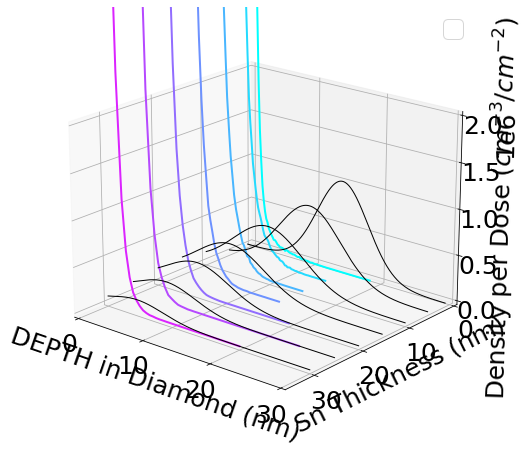

In [43]:
plt.rcParams.update({'font.size': 25})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 30)
ax.set_ylim(0, 35)
ax.set_zlim(0, 0.2e7)
ax.set_xlabel('DEPTH in Diamond (nm)')
ax.set_ylabel('Sn Thickness (nm)')
ax.set_zlabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

plot3dSilicon(fine1nm['DEPTH'][1:],fine1nm['Sn'][1:], 1,1,colors[0])
plot3dSilicon(fine5nm['DEPTH'][1:],fine5nm['Sn'][1:], 5,0,colors[1])
plot3dSilicon(fine10nm['DEPTH'][1:],fine10nm['Sn'][1:],10,0,colors[2])
plot3dSilicon(fine15nm['DEPTH'][1:],fine15nm['Sn'][1:], 15,0,colors[3])
plot3dSilicon(fine20nm['DEPTH'][1:],fine20nm['Sn'][1:], 20,0,colors[4])
plot3dSilicon(fine25nm['DEPTH'][1:],fine25nm['Sn'][1:], 25,0,colors[5])
plot3dSilicon(fine30nm['DEPTH'][1:],fine30nm['Sn'][1:], 30,0,colors[6])


plot3dGallium(ga1nm['DEPTH'],ga1nm['Ga'], 1,1)
plot3dGallium(ga5nm['DEPTH'],ga5nm['Ga'], 5,0)
plot3dGallium(ga10nm['DEPTH'],ga10nm['Ga'],10,0)
plot3dGallium(ga15nm['DEPTH'],ga15nm['Ga'], 15,0)
plot3dGallium(ga20nm['DEPTH'],ga20nm['Ga'], 20,0)
plot3dGallium(ga25nm['DEPTH'],ga25nm['Ga'], 25,0)
plot3dGallium(ga30nm['DEPTH'],ga30nm['Ga'], 30,0)



ax.view_init(elev=20., azim=-50)
ax.set_ylim(ax.get_ylim()[::-1])

fig.savefig('finalPlot2.svg', format= 'svg',transparent=True)

# ax.legend()